In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from collections import OrderedDict
import pickle
import seaborn as sns

In [4]:
# get data
df = pd.read_pickle("../data/Electric_Vehicle_Charging_Station_Energy_Consumption_cleaned_covid.pkl")
df.head()

,Station_Name,Station_Address,City,State_Province,Postal_Code,Transaction_Date,Transaction_Start_Time,Charging_Time__minutes_,Energy__kWh_,GHG_Savings__kg_,...,Transaction_Date_Datetime,start_Datetime,end_Datetime,year,idle_time_minutes,latitude,longitude,weekday,weekday_name,distance_center_km
0,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,2018/01/31 00:00:00+00,2021/01/21 17:43:00+00,128.0,2.84,1.19,...,2018-01-31 00:00:00+00:00,2018-01-31 17:43:00,2018-01-31 19:51:00,2018,929.0,40.018482,-105.281066,2,Wednesday,0.152203
1,COMM VITALITY / 1000WALNUT1,900 Walnut St,Boulder,Colorado,80302,2018/01/31 00:00:00+00,2021/01/21 17:16:00+00,68.0,5.66,2.38,...,2018-01-31 00:00:00+00:00,2018-01-31 17:16:00,2018-01-31 18:24:00,2018,228.0,40.015994,-105.282473,2,Wednesday,0.378654
2,BOULDER / REC CENTER ST2,1305-1335 Gillaspie Dr,Boulder,Colorado,80305,2018/01/31 00:00:00+00,2021/01/21 13:52:00+00,73.0,3.94,1.65,...,2018-01-31 00:00:00+00:00,2018-01-31 13:52:00,2018-01-31 15:05:00,2018,2356.0,39.974881,-105.249219,2,Wednesday,5.638648
3,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018/01/31 00:00:00+00,2021/01/21 13:54:00+00,40.0,4.42,1.86,...,2018-01-31 00:00:00+00:00,2018-01-31 13:54:00,2018-01-31 14:34:00,2018,1259.0,40.000148,-105.282437,2,Wednesday,2.096847
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,2018/01/31 00:00:00+00,2021/01/21 11:51:00+00,42.0,4.60,1.93,...,2018-01-31 00:00:00+00:00,2018-01-31 11:51:00,2018-01-31 12:33:00,2018,81.0,40.000148,-105.282437,2,Wednesday,2.096847


In [8]:
df['is_obs'] = 1
df_datetime = df.set_index(pd.DatetimeIndex(df['start_Datetime']))

In [9]:
names = df.Station_Name.unique()

avg_daily = dict.fromkeys(names)
for name in names:
    temp = df_datetime[df_datetime['Station_Name'] == name]
    temp_resample = temp.resample('D').sum()
    temp_resample.fillna(0,inplace=True)
    avg_daily[name] = temp_resample.is_obs.mean()
    
# Order the dictionary by key
avg_daily = OrderedDict(sorted(avg_daily.items(), key=lambda t: t[0]))

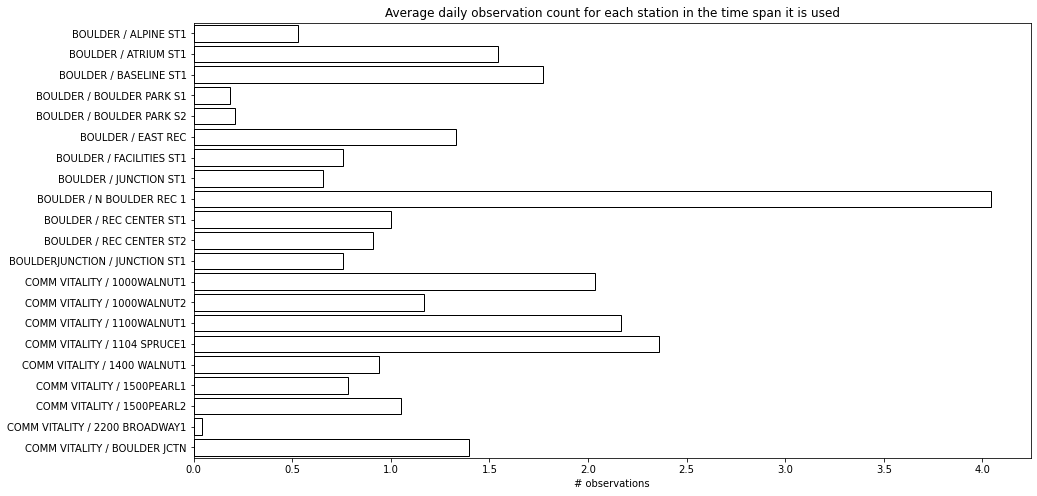

In [10]:
plt.rcParams['figure.figsize'] = (15, 8) # Figure size
ax = sns.barplot(x=[*avg_daily.values()], y=[*avg_daily.keys()],color='w',edgecolor='k')
ax.set_xlabel("# observations")
ax.set_title("Average daily observation count for each station in the time span it is used")
plt.show()

In [11]:
sorted(avg_daily.items(), key=lambda item: item[1], reverse=True)[0:5]

[('BOULDER / N BOULDER REC 1', 4.042253521126761),
 ('COMM VITALITY / 1104 SPRUCE1', 2.36),
 ('COMM VITALITY / 1100WALNUT1', 2.1669291338582677),
 ('COMM VITALITY / 1000WALNUT1', 2.037249283667622),
 ('BOULDER / BASELINE ST1', 1.771978021978022)]

The code block below counts for every charging station the amount of vehicles which are using the station for every Xth minute between the first and last observation of that station. 

In [12]:
"""
station_dict = {}
p=0
for stat in df['Station_Name'].unique():
    p += 1
    print(stat, ":", round(p/len(names)*100,3))
    temp = df[df['Station_Name'] == stat]
    t0, tmax = temp['start_Datetime'].min(), temp['end_Datetime'].max()
    t1 = t0 + pd.Timedelta(minutes=0.5)
    d = {'t0': [], 't1': [], 'nobs': []}

    while t0 < tmax:
        # lower boundary included, upper boundary excluded
        m = (temp['end_Datetime']>t0) & (temp['start_Datetime']<=t1)
        d['t0'].append(t0)
        d['t1'].append(t1)
        d['nobs'].append(m.sum())
        t0, t1 = t1, t1 + pd.Timedelta(minutes=0.5)
        
    station_dict[stat] = {'t0':d['t0'], 't1':d['t1'], 'nobs':d['nobs']}
with open("idle_times.pickle","wb") as handle:
    pickle.dump(station_dict,handle, protocol=pickle.HIGHEST_PROTOCOL)
"""

'\nstation_dict = {}\np=0\nfor stat in df[\'Station_Name\'].unique():\n    p += 1\n    print(stat, ":", round(p/len(names)*100,3))\n    temp = df[df[\'Station_Name\'] == stat]\n    t0, tmax = temp[\'start_Datetime\'].min(), temp[\'end_Datetime\'].max()\n    t1 = t0 + pd.Timedelta(minutes=0.5)\n    d = {\'t0\': [], \'t1\': [], \'nobs\': []}\n\n    while t0 < tmax:\n        # lower boundary included, upper boundary excluded\n        m = (temp[\'end_Datetime\']>t0) & (temp[\'start_Datetime\']<=t1)\n        d[\'t0\'].append(t0)\n        d[\'t1\'].append(t1)\n        d[\'nobs\'].append(m.sum())\n        t0, t1 = t1, t1 + pd.Timedelta(minutes=0.5)\n        \n    station_dict[stat] = {\'t0\':d[\'t0\'], \'t1\':d[\'t1\'], \'nobs\':d[\'nobs\']}\nwith open("time_series_count_05min_v1.pickle","wb") as handle:\n    pickle.dump(station_dict,handle, protocol=pickle.HIGHEST_PROTOCOL)\n'

In [13]:
with open("idle_times.pickle", "rb") as handle:
    station_dict = pickle.load(handle)

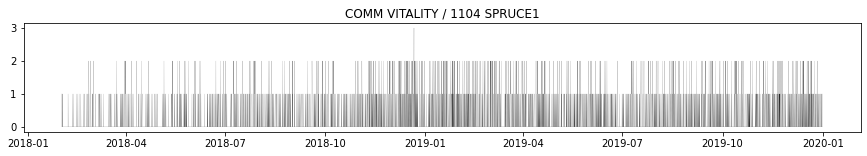

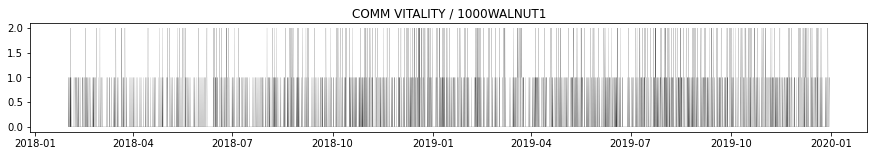

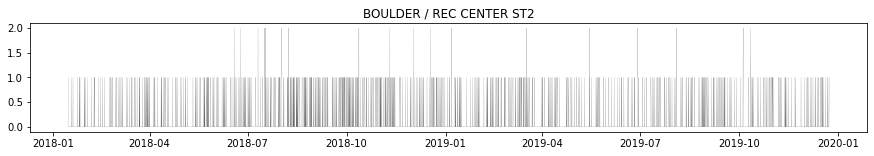

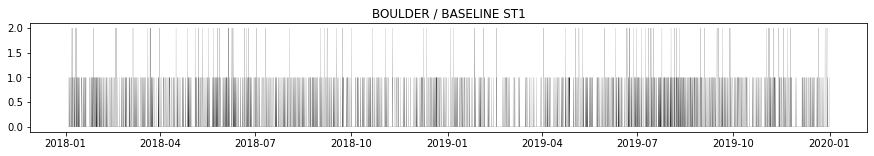

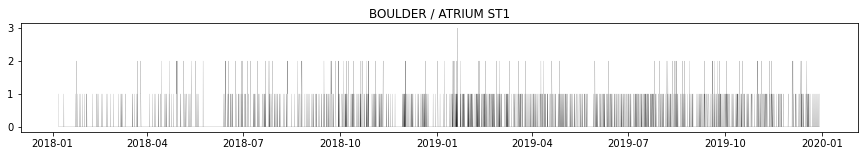

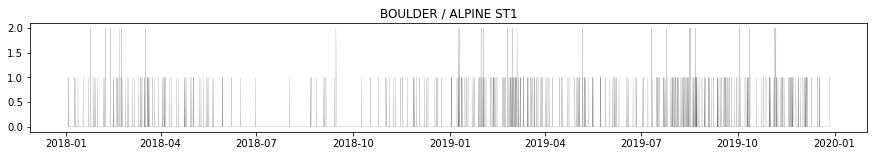

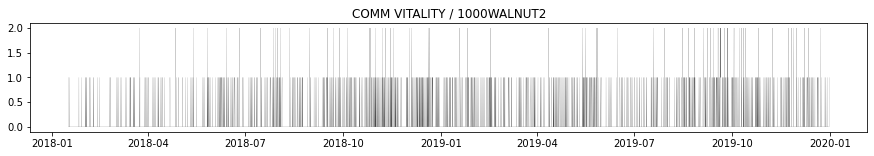

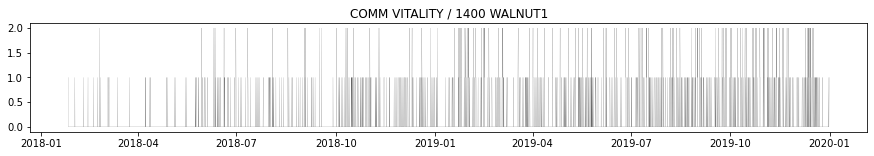

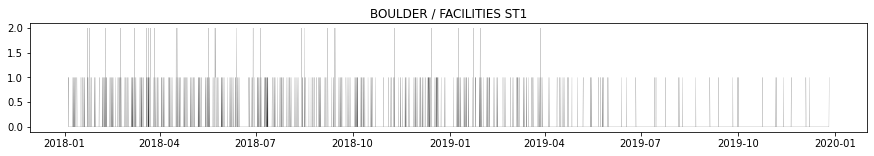

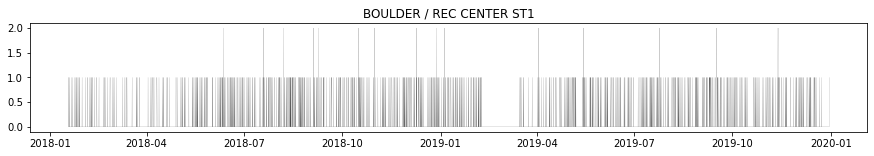

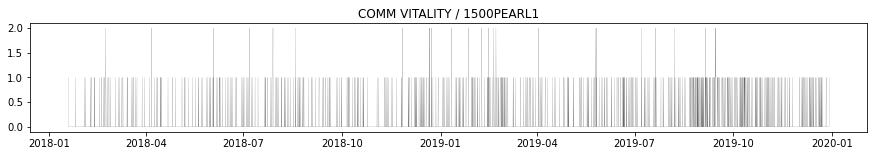

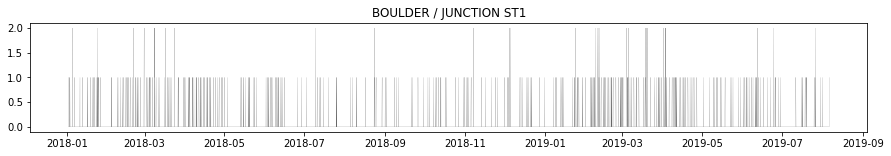

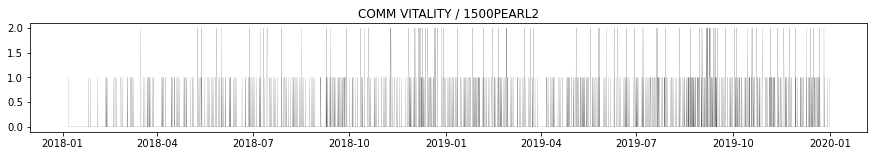

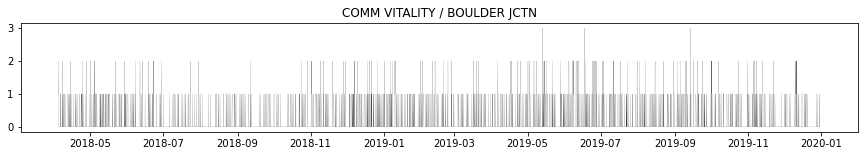

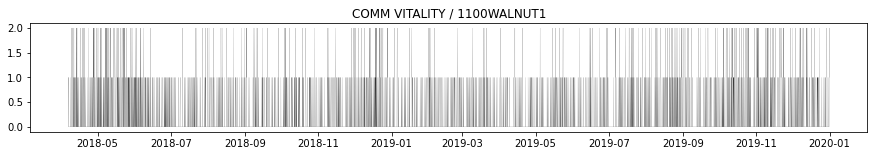

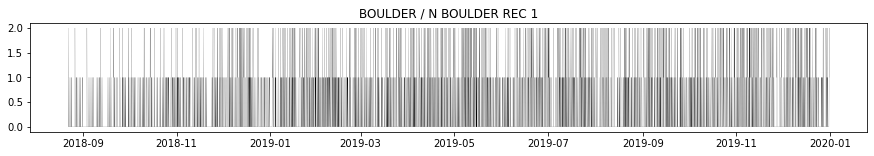

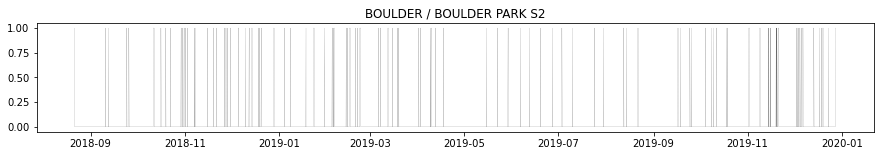

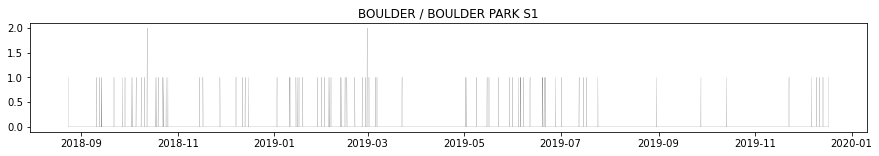

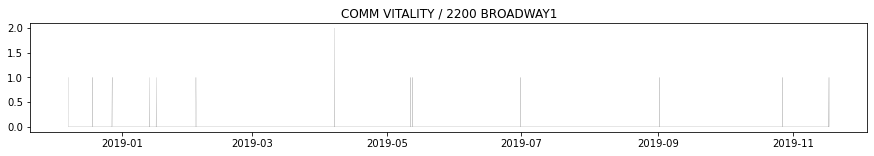

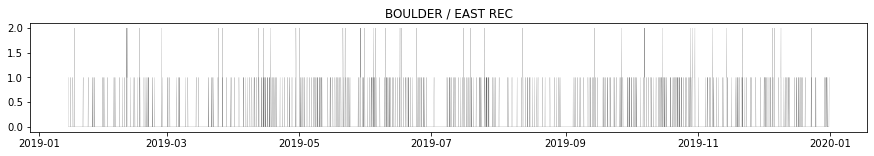

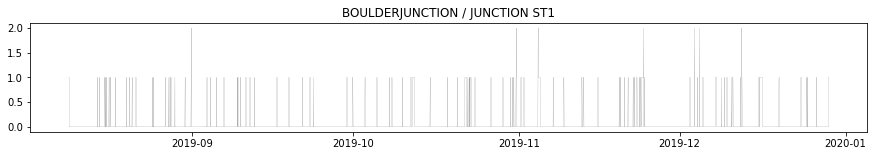

In [14]:
plt.rcParams['figure.figsize'] = (15, 2) # Figure size

utilization = {}

for stat in names:
    temp = station_dict[stat]
    plt.plot(temp['t0'],temp['nobs'], linewidth=0.1, color='k')
    plt.title(stat)
    plt.show()
    
    if 0 in temp['nobs']:
        uni = np.unique(temp['nobs'], return_counts=True)
        utili = 100-(uni[1][0]/len(temp['nobs'])*100)
        #print("Percentage of time being used:", round(utili), '%')
        #print("Average daily charging sessions:", round(top5[i][1],2))
        utilization[stat] = utili
    else:
        #print("Utilization:", 0.00, "%")
        #print("Average daily charging sessions:", round(top5[i][1],2))
        utilization[stat] = 0